In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import seaborn as sns


In [7]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [8]:
df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Final Project 1.csv')
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [9]:
df.isnull().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

In [10]:
df.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


In [12]:
df['quality'].value_counts()

5    681
6    638
7    199
4     53
8     18
3     10
Name: quality, dtype: int64

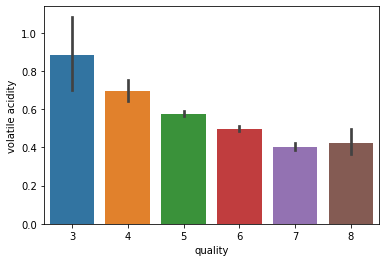

In [24]:
sns.barplot(x='quality' , y = df['volatile acidity'] , data = df)


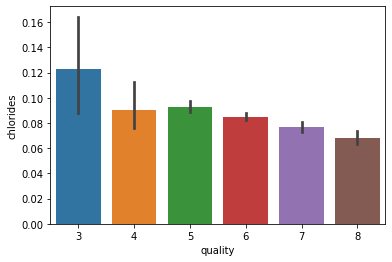

In [25]:
sns.barplot(x='quality' , y = df['chlorides'] , data = df)


In [14]:
x = df.drop(['quality'],axis=1)
y = df['quality']
x

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4
...,...,...,...,...,...,...,...,...,...,...,...
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2
1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2


In [15]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=1000)

In [16]:
from sklearn.linear_model import LinearRegression

model = LinearRegression()
model.fit(x_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [17]:
y_pred = model.predict(x_test)
y1 = [ round(i)  for i in y_pred]
y_pred = np.array(y1)
y_pred


array([5, 7, 6, 5, 5, 5, 5, 6, 6, 5, 6, 5, 5, 5, 5, 6, 5, 6, 6, 6, 5, 5,
       5, 5, 5, 5, 6, 6, 5, 5, 6, 5, 6, 6, 6, 6, 6, 6, 5, 5, 7, 6, 5, 5,
       5, 6, 6, 5, 6, 6, 5, 6, 5, 6, 5, 6, 6, 6, 5, 5, 6, 6, 6, 6, 5, 5,
       6, 5, 5, 5, 5, 6, 5, 6, 5, 6, 6, 6, 6, 5, 5, 5, 6, 5, 5, 5, 6, 6,
       5, 6, 5, 5, 6, 6, 5, 6, 5, 5, 5, 6, 6, 5, 6, 6, 6, 5, 6, 5, 6, 6,
       6, 5, 5, 6, 6, 6, 5, 5, 6, 5, 5, 6, 6, 5, 5, 5, 5, 5, 6, 5, 6, 5,
       5, 6, 5, 5, 5, 7, 6, 6, 5, 5, 5, 6, 7, 6, 6, 5, 6, 6, 5, 5, 5, 6,
       6, 5, 6, 5, 6, 6, 7, 5, 5, 6, 5, 5, 5, 6, 6, 6, 6, 5, 6, 6, 5, 6,
       6, 6, 6, 6, 5, 6, 6, 5, 5, 6, 5, 6, 6, 6, 6, 6, 5, 6, 6, 6, 6, 5,
       6, 5, 6, 6, 5, 5, 5, 5, 6, 7, 5, 6, 6, 5, 6, 6, 7, 5, 6, 5, 6, 6,
       6, 5, 5, 5, 6, 5, 5, 6, 6, 6, 5, 5, 5, 5, 6, 6, 5, 6, 6, 5, 5, 5,
       6, 5, 6, 5, 5, 5, 6, 6, 5, 6, 6, 6, 6, 6, 5, 6, 6, 6, 5, 5, 6, 6,
       5, 6, 6, 5, 6, 6, 5, 7, 6, 6, 5, 6, 5, 5, 5, 6, 6, 6, 6, 6, 5, 6,
       6, 5, 5, 5, 6, 6, 6, 6, 5, 5, 6, 6, 7, 6, 5,

In [18]:
from sklearn.metrics import r2_score
from sklearn.metrics import accuracy_score

In [19]:
y_train_pred = model.predict(x_train)
train_score = r2_score(y_train,y_train_pred)
print(f'Train Data Accuracy : {round(train_score*100,2)} %')

Train Data Accuracy : 36.24 %


In [20]:
y_test_pred = model.predict(x_test)
test_score = r2_score(y_test,y_test_pred)
print(f'Train Data Accuracy : {round(test_score*100,2)} %')

Train Data Accuracy : 33.99 %
